# **Install Dependencies:**

In [ ]:
%cd /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel

!git clone https://github.com/ultralytics/yolov5
%cd yolov5

/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5


In [ ]:
!pip install -r requirements.txt
!pip install google-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=e79c9ead6956403eaff30288bbf735d96a314be90c6acbc93b043eecfea209f6
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images
from google_utils import Google

#clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


In [ ]:
%cat /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/data.yaml

train: /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/train
val: /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/test

nc: 5
names: ['hat','vest','goggles','glove','shoe']





---



# **Define Model Configuration and Architecture:**

In [ ]:
import yaml
with open("/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/data.yaml",'r') as stream:
  num_classes= str(yaml.safe_load(stream)['nc'])

In [ ]:
%cat /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open (line,'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/models/custom_yolov5s.yaml

#parameters
nc: {num_classes}
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple


anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]



---




# **Train Custom Yolov5 Model:**

In [ ]:

%%time
%cd /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5
!python train.py --img 416 --batch 32 --epochs 100 --cfg '/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/models/custom_yolov5s.yaml'  --data '/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/data.yaml' --name yolov5s_results --cache

/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5
train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/models/custom_yolov5s.yaml, data=/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, mo

In [ ]:
!pip install tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




---



# **Evaluation of the model:**

In [ ]:
!pip install python-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


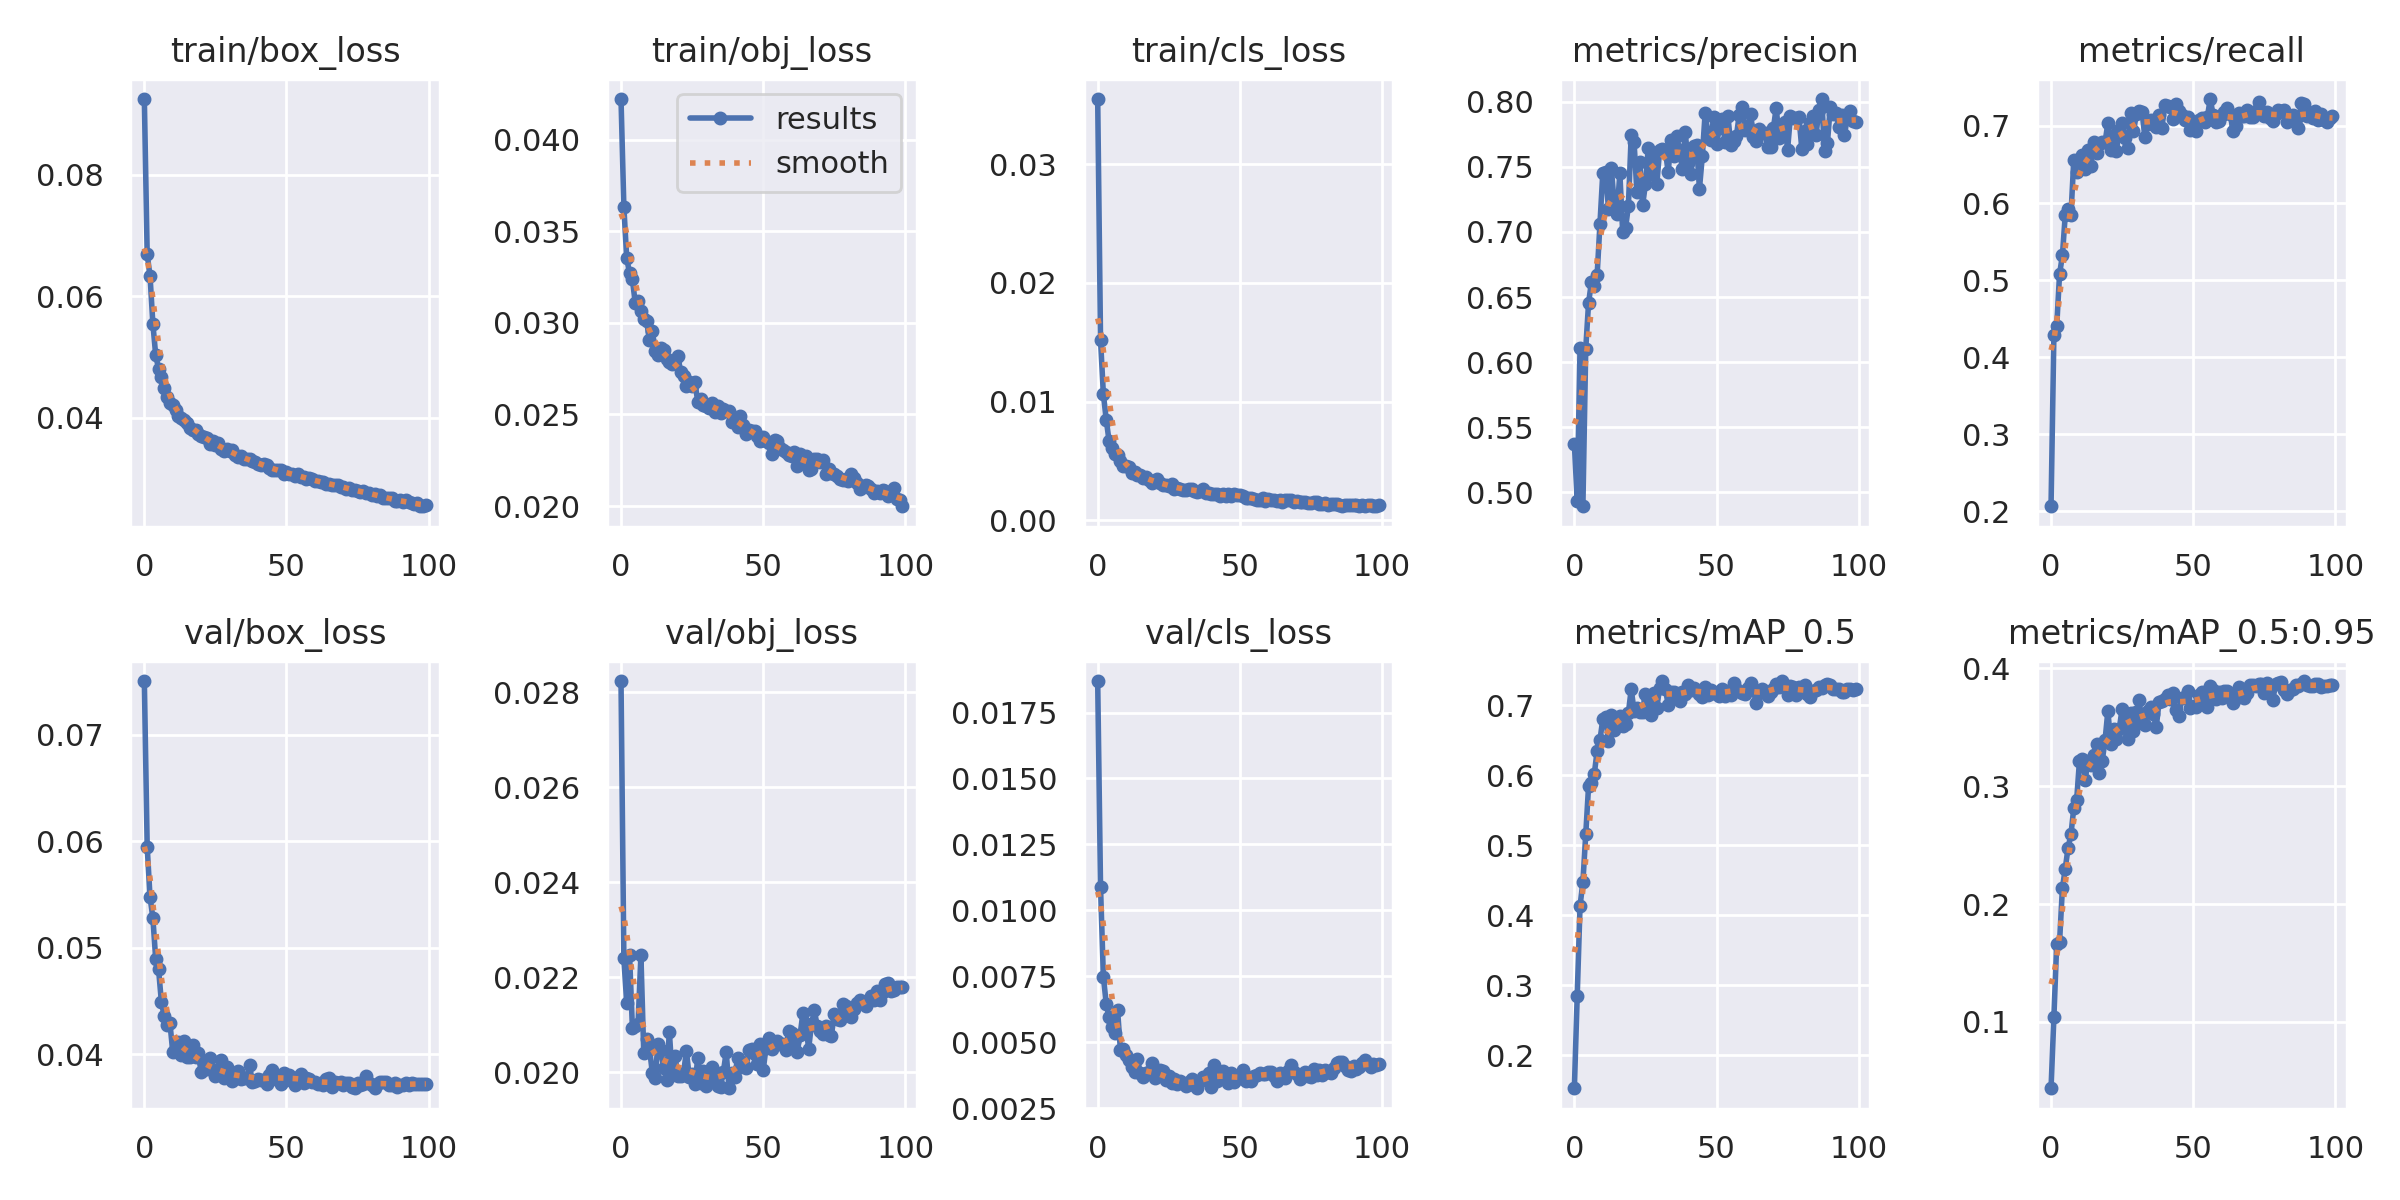

In [ ]:
from python_utils import plot_results
Image(filename='/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/runs/train/yolov5s_results/results.png',width=1000)



---


# **Inference using Custom model:**

In [ ]:
%ls runs/

train/


In [ ]:
%ls /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 13.6 MB/s eta 0:00:00


In [ ]:
#%cd /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5
!python detect.py --weights /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/test/images

detect: weights=['/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 132.5 MB/s eta 0:00:00

requirements: 1 package updated per /con

In [ ]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


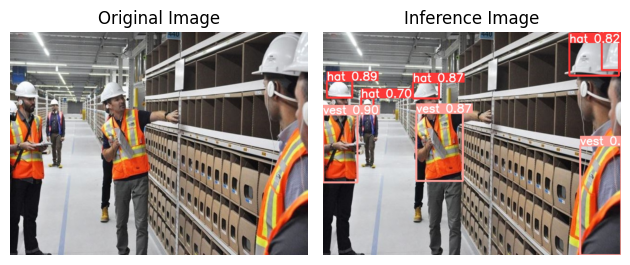

In [8]:
import matplotlib.pyplot as plt

#import images
img_original= plt.imread("/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/dataset/images/test/images/wh_dresscode_0903.jpg")
img_inference= plt.imread("/content/drive/MyDrive/Ineuron/DL/Warehouse_Apparel/yolov5/runs/detect/exp/wh_dresscode_0903.jpg")

# Create a figure and set up subplots
fig, axs = plt.subplots(1, 2)

# Display the first image
axs[0].imshow(img_original)
axs[0].axis('off')
axs[0].set_title('Original Image')

# Display the second image
axs[1].imshow(img_inference)
axs[1].axis('off')
axs[1].set_title('Inference Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



---

